## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [53]:
# your code here
import osmnx as ox, geopandas as gpd
import pandas as pd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

import pysal as ps
import seaborn as sns

from pysal.lib import weights
from libpysal.io import open as psopen
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd

%matplotlib inline
ox.settings.log_console=True
ox.settings.use_cache=True

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    32844 non-null  object  
 1   lsoa11nm    32844 non-null  object  
 2   lsoa11nmw   32844 non-null  object  
 3   st_areasha  32844 non-null  float64 
 4   st_lengths  32844 non-null  float64 
 5   IMD_Rank    32844 non-null  int64   
 6   IMD_Decile  32844 non-null  int64   
 7   LSOA01NM    32844 non-null  object  
 8   LADcd       32844 non-null  object  
 9   LADnm       32844 non-null  object  
 10  IMDScore    32844 non-null  float64 
 11  IMDRank0    32844 non-null  int64   
 12  IMDDec0     32844 non-null  int64   
 13  IncScore    32844 non-null  float64 
 14  IncRank     32844 non-null  int64   
 15  IncDec      32844 non-null  int64   
 16  EmpScore    32844 non-null  float64 
 17  EmpRank     32844 non-null  int64   
 18  EmpDec      32844 non-null  int64   
 

<Axes: >

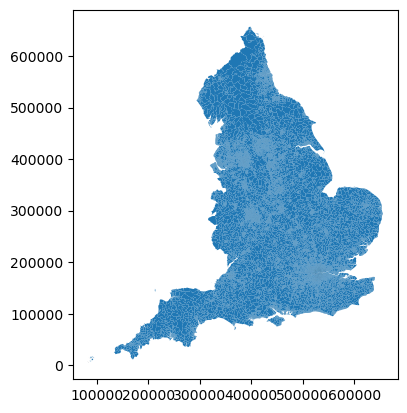

In [55]:
#loading up the Liverpool IMD dataset
Liverpool = 'data/IMD/lab04_imd.shp'
lookup_path = 'data/IMD/OAs/'
imd = gpd.read_file(Liverpool)

imd.info()
imd.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    32844 non-null  object  
 1   lsoa11nm    32844 non-null  object  
 2   lsoa11nmw   32844 non-null  object  
 3   st_areasha  32844 non-null  float64 
 4   st_lengths  32844 non-null  float64 
 5   IMD_Rank    32844 non-null  int64   
 6   IMD_Decile  32844 non-null  int64   
 7   LSOA01NM    32844 non-null  object  
 8   LADcd       32844 non-null  object  
 9   LADnm       32844 non-null  object  
 10  IMDScore    32844 non-null  float64 
 11  IMDRank0    32844 non-null  int64   
 12  IMDDec0     32844 non-null  int64   
 13  IncScore    32844 non-null  float64 
 14  IncRank     32844 non-null  int64   
 15  IncDec      32844 non-null  int64   
 16  EmpScore    32844 non-null  float64 
 17  EmpRank     32844 non-null  int64   
 18  EmpDec      32844 non-null  int64   
 

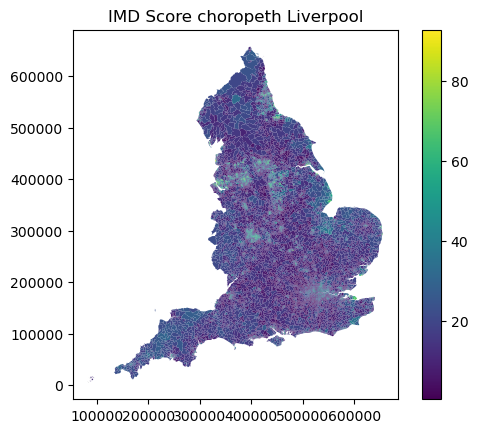

In [56]:
#create a Choropeth for the IMD score variable
choropeth = imd.plot('IMDScore', legend = True)
choropeth.set_title("IMD Score choropeth Liverpool")
imd.info()

In [57]:
#Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
w_queen = weights.Queen.from_dataframe(imd, ids ="lsoa11cd")

w_queen

/Users/juliavanraamsdonk/miniconda3/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There is 1 island with id: E01019077.
  W.__init__(self, neighbors, ids=ids, **kw)


In [49]:
#create the standardized version of the imd scores
std_imd = (imd['IMDScore'] - imd['IMDScore'].mean()) / imd['IMDScore'].std()

In [60]:
#Calculate the spatial lag of the standardized scores.
std_w_imd = pd.Series(weights.lag_spatial(w_queen, std_imd), index=std_imd.index)

print("The spatial lag of the standardized score is:", std_w_imd)

The spatial lag of the standardized score is: 0        -2.269791
1        -1.643764
2        -1.971466
3        -1.684579
4         1.239639
           ...    
32839    26.268396
32840     7.127407
32841    -0.559356
32842     9.149226
32843     4.051494
Length: 32844, dtype: float64


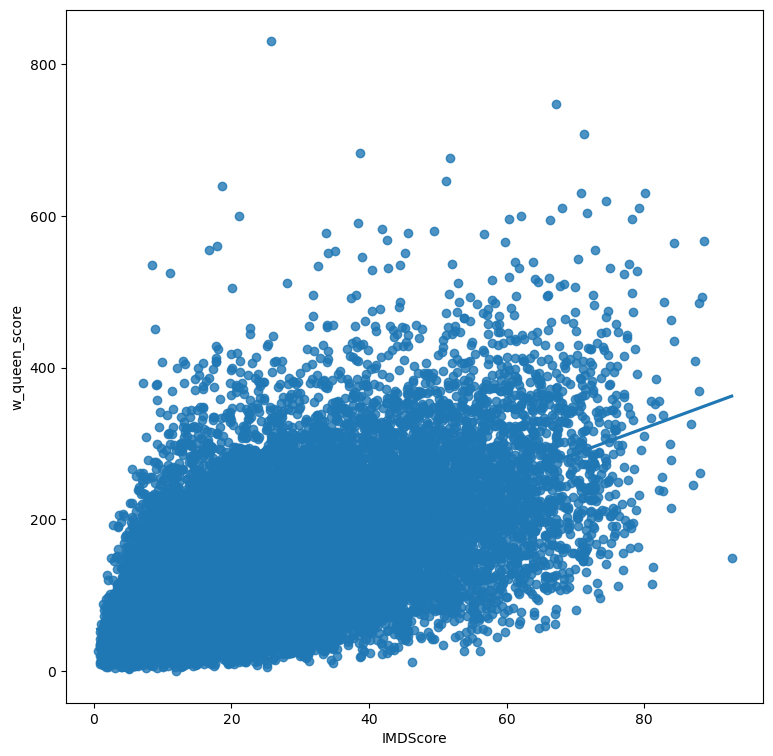

In [61]:
#Create the Moran Plot.
w_queen_score = weights.lag_spatial(w_queen, imd['IMDScore'])
imd['w_queen_score'] = w_queen_score

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="IMDScore", y="w_queen_score", data=imd, ci=None)
# Display
plt.show()

In [63]:
#Calculate the value of Moran's I as well as its significance level.
mi.I

print("the value of the significance level is:" ,mi.I)

the value of the significance level is: 0.6031245807165552


In [65]:
#Perform a LISA analysis and generate a map of the results. What are the main patterns?
lisa = esda.Moran_Local(imd["w_queen_score"],w_queen)

('WARNING: ', 'E01019077', ' is an island (no neighbors)')


In [68]:
# Break observations into significant or not
imd['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
imd['quadrant'] = lisa.q

In [70]:
imd['significant'].head()

0    False
1    False
2    False
3    False
4     True
Name: significant, dtype: bool

In [71]:

lisa.p_sim[:5]

array([0.375, 0.376, 0.366, 0.211, 0.036])

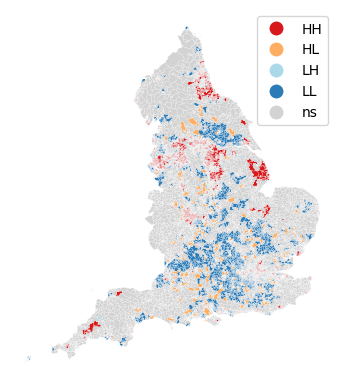

In [72]:
lisa_cluster(lisa, imd);

For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

In [96]:
# your code here
## Question 1: Building a Contiguity-Based Weight Matrix

#Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

 #   Reads in a shapefile of polygons.
  #  Constructs a Queen contiguity-based spatial weights matrix.
   # Returns the weight matrix.


In [75]:
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GUID        636 non-null    object  
 1   SPORTPARK   636 non-null    object  
 2   FUNCTIONEE  636 non-null    object  
 3   OBJECTTYPE  636 non-null    object  
 4   TYPE_OBJEC  629 non-null    object  
 5   VELD_INDEL  634 non-null    object  
 6   JAAR_VAN_A  636 non-null    float64 
 7   SPORTFUNCT  635 non-null    object  
 8   MATERIAAL   627 non-null    object  
 9   OMTREK_GIS  636 non-null    float64 
 10  OPPERVLAKT  636 non-null    float64 
 11  geometry    636 non-null    geometry
dtypes: float64(3), geometry(1), object(8)
memory usage: 59.8+ KB


<Axes: >

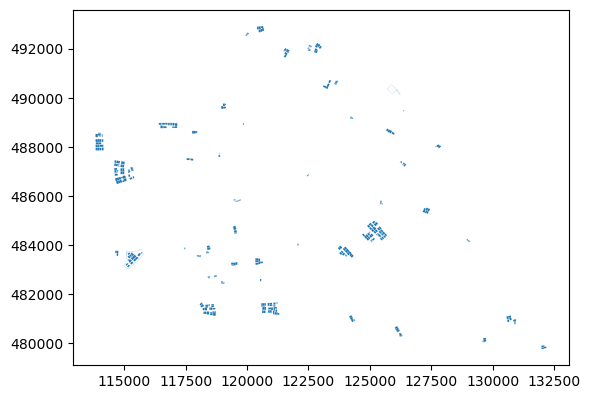

In [130]:
# This will be different on your computer and will depend on where
# you have downloaded the files

# Read the MIF file
imd = gpd.read_file('/Users/juliavanraamsdonk/Documents/Studie/MADE/Year 1/Data 1/lab-04/data/Sportparken/Sportvelden 05122019.shx')


# Display summary of the GeoDataFrame
imd.info()

# Plot the spatial data
imd.plot()



In [133]:
#The following function will read a shapefile and create a contiguity-based weight matrix
#Queen contiguity means, that if two polygons share a boundary or vertex, they are considered neighbors

def create_contiguity_weights(file_path):

    gdf = gpd.read_file(file_path)

    W = weights.Queen.from_dataframe(gdf)

    return W, gdf

file_path = 'data/Sportparken/Sportvelden 05122019.shx'

contiguity_weights, gdf = create_contiguity_weights(file_path)



/var/folders/6k/rd12pwy15z70vdrc1s80hydm0000gn/T/ipykernel_83072/233014065.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(gdf)
/Users/juliavanraamsdonk/miniconda3/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 446 disconnected components.
 There are 340 islands with ids: 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 51, 52, 57, 61, 62, 66, 67, 68, 69, 74, 77, 79, 80, 88, 89, 90, 94, 95, 96, 109, 110, 111, 112, 113, 114, 115, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 136, 137, 138, 147, 148, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 180, 181, 182, 183, 187, 193, 1

In [124]:
## Question 2: Calculating Moran’s I

#Write a function calculate_morans_i that:

 #   Takes a spatial weight matrix W and an attribute array y.
  #  Calculates Moran’s I for the given attribute array.
   # Returns the Moran’s I value and its p-value.


In [135]:
def calculate_moran_i(W,y):
    #W is spatial weight matrix
    #y attribute array for which to calculate Moran I
    if np.any(np.isnan(y)):
        raise ValueError("The attribute array contains NaN values")


    moran = esda.Moran(y, W)
    return moran.I , moran.p_sim

weights_matrix, gdf = create_contiguity_weights(file_path)

attribute_array = np.array(gdf['OPPERVLAKT'])

morans_I, p_val = calculate_moran_i(weights_matrix, attribute_array)

print(f"Moran's I: {morans_I}")
print(f"P-value: {p_val}")

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARN

/var/folders/6k/rd12pwy15z70vdrc1s80hydm0000gn/T/ipykernel_83072/233014065.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(gdf)
/Users/juliavanraamsdonk/miniconda3/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 446 disconnected components.
 There are 340 islands with ids: 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 51, 52, 57, 61, 62, 66, 67, 68, 69, 74, 77, 79, 80, 88, 89, 90, 94, 95, 96, 109, 110, 111, 112, 113, 114, 115, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 136, 137, 138, 147, 148, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 180, 181, 182, 183, 187, 193, 1

In [122]:
## Question 3: Standardizing Spatial Weight Matrices

#Create a function standardize_weights that:

    #Takes a spatial weight matrix W.
   # Standardizes it so that the weights of each row sum to one.
    #Returns the standardized weight matrix.

In [129]:
def standarize_weights(W):
    W.transform = 'R'
    return W

     

In [136]:
## Question 4: Creating Distance-Based Weights

#Write a function create_distance_weights that:

  #  Takes a set of point coordinates and a threshold distance.
   # Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    #Returns the weight matrix.

In [141]:
def create_distance_weights(coords, threshold):
    w = weights.DistanceBand(coords, threshold)
    return w

coords = gdf.geometry.centroid.apply(lambda geom: (geom.x, geom.y)).tolist()
threshold_distance = 500  # Adjust this value based on your analysis needs
distance_weights = create_distance_weights(coords, threshold_distance)
print(distance_weights)



/Users/juliavanraamsdonk/miniconda3/lib/python3.12/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 41 disconnected components.
 There are 3 islands with ids: 422, 479, 535.
  w = W(neighbors, weights, ids, **kwargs)
/Users/juliavanraamsdonk/miniconda3/lib/python3.12/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 41 disconnected components.
 There are 3 islands with ids: 422, 479, 535.
  W.__init__(


In [142]:
## Question 5: Visualizing a Moran Plot
#Using PySAL, write a function plot_moran that:

 #   Takes a spatial weights matrix W and an attribute array y.
  #  Creates and displays a Moran plot for the attribute.
   # Saves the Moran plot as an image file.

In [147]:
def plot_moran(W,y):
    mi = esda.Moran(y, W)

    spatial_lag = weights.lag_spatial(y, W)

    plt.scatter(mi.z_sim, mi.e_sim, c='blue', edgecolors='k', alpha = 0.5)
    plt.savefig('moran_plot.png')
    plt.show()
    plt.title("Moran's I Plot")
    plt.xlabel("Standardized Value")
    plt.ylabel("Spatial Lag")
    plt.grid(True)

plot_moran(weights_matrix, gdf['OPPERVLAKT'])

AttributeError: Can only use the '.sparse' accessor with Sparse data.